1. Implement the concept of sampling and quantization in image processing.
2. Implement the concept of correlation method using at least 2 filter.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Sampling and Quantization
image_name = 'image.jpg'

def quantize_image(image, levels):
    step_size = 256 / levels
    quantized_image = np.floor_divide(image, step_size) * step_size
    return quantized_image

def sample_image(image, factor):
    sampled_image = image[::factor, ::factor]
    return sampled_image

def plot_images(images, titles):
    #display info like image shape etc
    print('Information: ')
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, image, title in zip(axes, images, titles):
        print(f'{title}: {image.shape}')
        print(f'Min: {image.min()}, Max: {image.max()}')
        print(f'Mean: {image.mean()}, Std: {image.std()}')
        print()
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(title)
    plt.show()

In [11]:
img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Information: 
Original: (1600, 1199)
Min: 0, Max: 255
Mean: 132.8876490825688, Std: 62.13858590854978

8 levels: (1600, 1199)
Min: 0.0, Max: 224.0
Mean: 117.33801501251043, Std: 62.59195690039008

4 levels: (1600, 1199)
Min: 0.0, Max: 192.0
Mean: 101.92987489574645, Std: 63.211031595208695

2 levels: (1600, 1199)
Min: 0.0, Max: 128.0
Mean: 75.251976647206, Std: 63.00311914128324



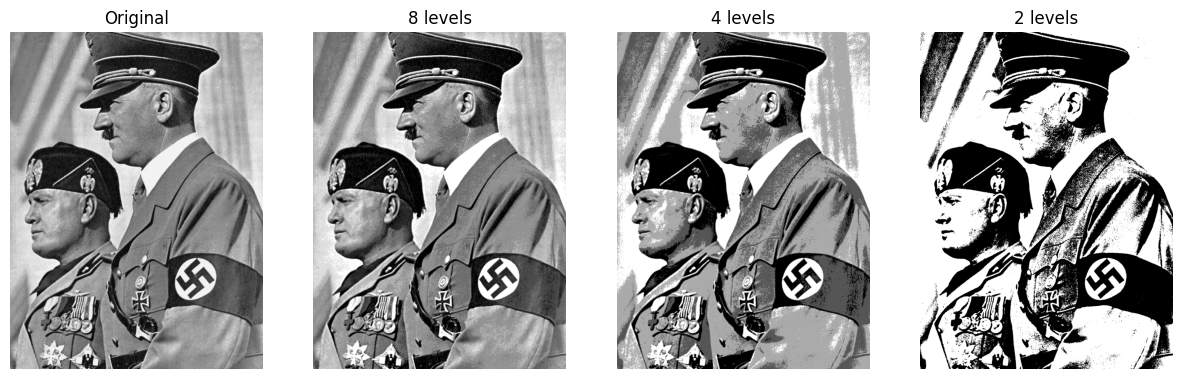

In [13]:
plot_images([img, quantize_image(img, 8), quantize_image(img, 4), quantize_image(img, 2)], ['Original', '8 levels', '4 levels', '2 levels'])

Information: 
Original: (1600, 1199)
Min: 0, Max: 255
Mean: 132.8876490825688, Std: 62.13858590854978

Factor 2: (800, 600)
Min: 0, Max: 255
Mean: 132.92257916666668, Std: 62.132046831844875

Factor 4: (400, 300)
Min: 0, Max: 254
Mean: 132.92053333333334, Std: 62.13618405069805

Factor 8: (200, 150)
Min: 0, Max: 254
Mean: 133.00743333333332, Std: 62.12822743926914



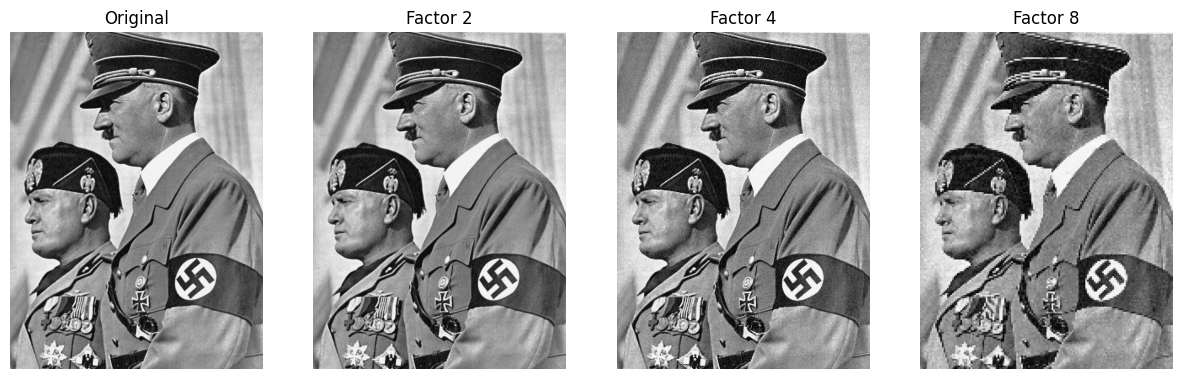

In [14]:
plot_images([img, sample_image(img, 2), sample_image(img, 4), sample_image(img, 8)], ['Original', 'Factor 2', 'Factor 4', 'Factor 8'])

Information: 
(Filter 1): (1600, 1199)
Min: 0, Max: 255
Mean: 19.205659403669724, Std: 34.635147552358596

(Filter 2): (1600, 1199)
Min: 0, Max: 255
Mean: 230.512001146789, Std: 60.541499888642264



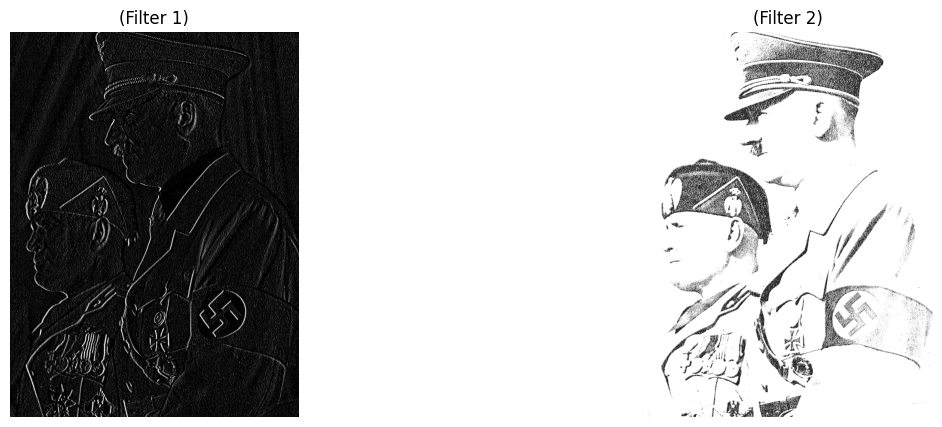

In [38]:
# Define the filters
filter1 = np.array([[0.1, 0.9, -1], [1, 0, -1], [2, 0, -2]])
filter2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filter2 = np.array([[3, -1, -1], [-1, 8, -1], [-1, -1, -1]])


# Apply the filters to the image
filtered_image1 = cv2.filter2D(img, -1, filter1)
filtered_image2 = cv2.filter2D(img, -1, filter2)

# Plot the filtered images
plot_images([filtered_image1, filtered_image2], ['(Filter 1)', '(Filter 2)'])
